<a href="https://colab.research.google.com/github/shoopy7/shoopy7/blob/main/Share_of_Kaggle_Practice_Titanic_notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Import libraries for pipeline creation
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import make_pipeline  # Import from imblearn

# Import libraries for preprocessing
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#from xgboost import XGBClassifier
from xgboost import XGBClassifier

#importing tensorflow library
import tensorflow as tf
# importing keras library
from tensorflow import keras
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.initializers import he_uniform, he_normal
from keras.layers import Input, Dense
from keras.layers import BatchNormalization

# Library to import different loss functions
from tensorflow.keras import losses
from sklearn.metrics import confusion_matrix
from keras import callbacks
from tensorflow.keras.optimizers import Adam

# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras import optimizers
# optimizers.RMSprop
# from keras.layers import Input, SpatialDropout2D
# from tensorflow.keras.initializers import HeNormal

from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU




# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Import the backend module
from keras import backend as K
# Import the random module
import random

read in data files

from Kaggle:
Data Dictionary

Variable	Definition	Key

---

survival	Survival	0 = No, 1 = Yes


---


pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower


---


sex	Sex


---


Age	Age in years

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


---


sibsp	# of siblings / spouses aboard the Titanic

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)


---


parch	# of parents / children aboard the Titanic

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


---


ticket	Ticket number


---


fare	Passenger fare


---


cabin	Cabin number



---


embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data set
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic Competition 1/titanic data files 3/train.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

# Data Overview

sanity checks

In [ ]:
df.shape

(891, 12)

There are 891 observations (passengers) in this dataset and 12 features (columns).

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


A preview of the first 5 rows of the dataset.  There are integers, strings, and floats to consider, if we use all columns for analysis and modeling.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data types for each column.

In [ ]:
# checking for duplicate values in the data, summed
df.duplicated().sum()

0

There are no duplicated values in the data.

In [ ]:
# checking for missing values in each column of the data set
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 800)

In [ ]:
# Assuming 'data' is your DataFrame
# Check for missing values in a row and save as a variable

missing_rows = df[df.isnull().any(axis=1)]

# Display ALL rows with missing values
missing_rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000,0,0,350406,7.854,NaN,S


There are a few columns missing data.
* The age column is missing 177 values of the 891, almost 20% of the dataset
* The cabin numbers column is missing 687 of the 891 values, 77% of the dataset
* Embarked is missing only 2 values with other features having data, 0.002% of the dataset.

We will determine later in the project how to treat these features.

In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


There are some columns with a large range of unique vaules.
* There are 88 different age values in the dataset.
* There are 681 different ticket numbers.
* There are 248 different passenger fares.
* There are 147 different cabin numbers.
* As was stated inthe Data Dictionary, there are 3 locations of embarkment.

In [ ]:
# check all values in the column
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


There are the following number of passengers for each class:
* First class = 216
* Second class = 184
* Third class = 491

In [ ]:
# check all values in the column
df['Ticket'].value_counts()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


A sample of the 681 unique values for Ticket Numbers.

In [ ]:
# check all values in the column
df['Fare'].value_counts()

,count
Fare,
8.050,43
13.000,42
7.896,38
7.750,34
26.000,31
...,...
35.000,1
28.500,1
6.237,1


A sample of the 248 unique values for Fares.

In [ ]:
# check all values in the column
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


A sample of the 147 unique values for Cabin Numbers.

In [ ]:
# check all values in the column
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


 C = Cherbourg, Q = Queenstown, S = Southampton
 The following number of passengers embarked from (least to greatest):
 * Q = Queenstown = 77
 * C = Cherbourg = 168
 * S = Southampton = 644

In [ ]:
# summary statistics of numeric variables, transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


Observations:
* The fares range from 0 to 512.33 with the median being 14.45 which is much lower than the mean.  This suggests the data has outliers and is skewed to the right (toward fewer higher fares).
* The ranges of passenger ages is 0.4 to 80 years of age.  The median age is 28 which is a bit lower than the mean of 30 so there could be some outliers pulling the average age higher.


In [ ]:
# define a list of columns with encoded values
count_cats = ['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']

# iterate over the columns and print the value counts and percentages for columns with encoded values
for col in count_cats:
  print(f"\nValue counts for column '{col}':")
  print(df[col].value_counts().reset_index(name='Count'))
  print(f"\nPercentages:")
  print((df[col].value_counts() / df[col].shape[0]) * 100)
  print('*'*50)


Value counts for column 'Survived':
   Survived  Count
0         0    549
1         1    342

Percentages:
Survived
0   61.616
1   38.384
Name: count, dtype: float64
**************************************************

Value counts for column 'Pclass':
   Pclass  Count
0       3    491
1       1    216
2       2    184

Percentages:
Pclass
3   55.107
1   24.242
2   20.651
Name: count, dtype: float64
**************************************************

Value counts for column 'Sex':
      Sex  Count
0    male    577
1  female    314

Percentages:
Sex
male     64.759
female   35.241
Name: count, dtype: float64
**************************************************

Value counts for column 'Age':
      Age  Count
0  24.000     30
1  22.000     27
2  18.000     26
3  19.000     25
4  28.000     25
..    ...    ...
83 36.500      1
84 55.500      1
85  0.920      1
86 23.500      1
87 74.000      1

[88 rows x 2 columns]

Percentages:
Age
24.000   3.367
22.000   3.030
18.000   2.918
19.000   2.8

Observations:
In this dataset,
* 72% embarked from Southampton, 19% from Cherbourg, and 9% from Queenstown.
* 76% of the passengers were not traveling with parents/children.
* 68% of the passengers were not traveling with siblings.
* The percentage breakdown for gender is:
  male     65%
  female   35%
* The percentage breakdown for passenger class is:

  3  = 55%,

  1  = 24%,
  
  2  = 21%
* The percentage breakdown of the variable of interest, Survived, is:

  0 (did not survive) =  62%

  1 (did survive) =  38%

In [ ]:
# drop ID column as it is not a determining factor for a model
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
# verfiy dropped columns
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C
2,1,3,female,26.000,0,0,7.925,S
3,1,1,female,35.000,1,0,53.100,S
4,0,3,male,35.000,0,0,8.050,S


In [ ]:
df.shape

(891, 8)

* NOTE:
Before continuing, I will drop some columns thatdo not add to the analysis.

  * PassengerId is a unique identifier
  * Name is also a unique identifier
  * Ticket number is not needed for analysis.  The 681 different values are in a variety of formats.
  * Cabin numbers have 147 different values and 204 missing values.  This column will be dropped for now.  (There is some thought that the cabin locations may impact survival, but with 1/4 of the observations missing this feature, I decided to drop it.)

  There are now only 8 features in the dataset.
    * 4 are categorical
    * 4 are numeric

EDA

univariate

In [ ]:
# function to create histograms with box plots for univariate analysis
def histogram_boxplot(data, feature, figsize=(8, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (8,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots for univariate analysis
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

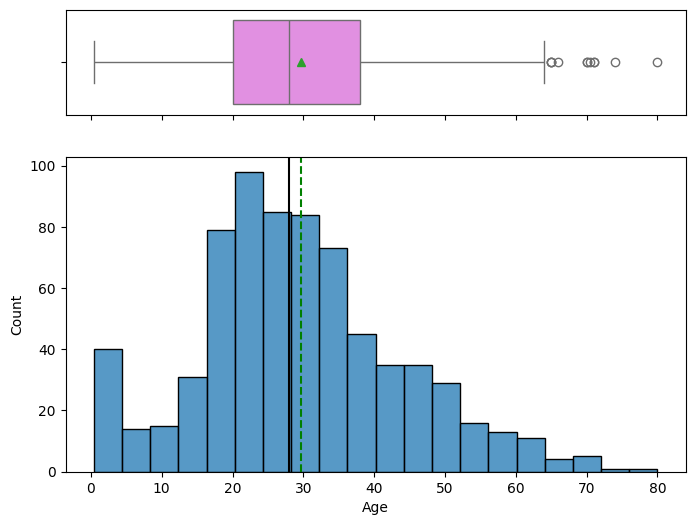

In [ ]:
#visualize Age column histogram and distribution
histogram_boxplot(df,'Age')

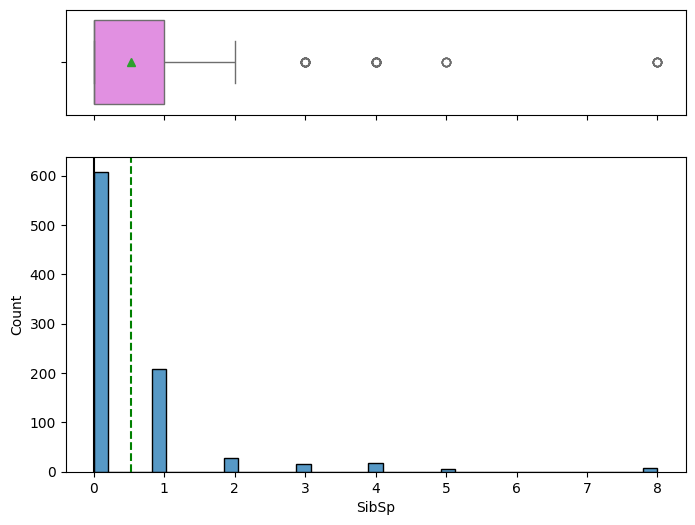

In [ ]:
#visualize Age column histogram and distribution
histogram_boxplot(df,'SibSp')

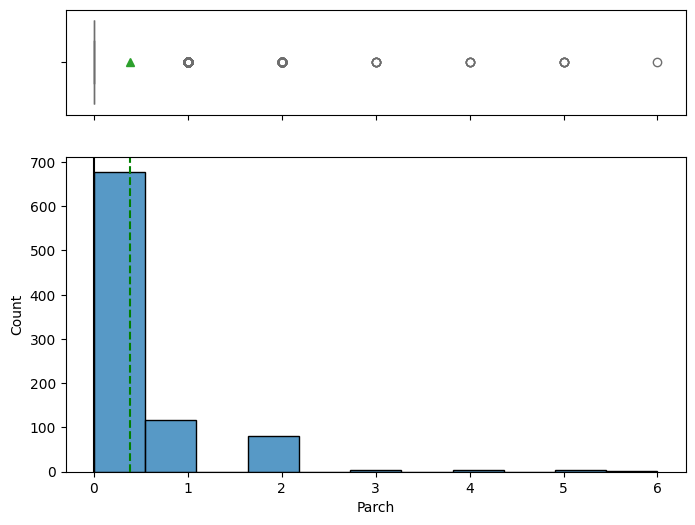

In [ ]:
#visualize Age column histogram and distribution
histogram_boxplot(df,'Parch')

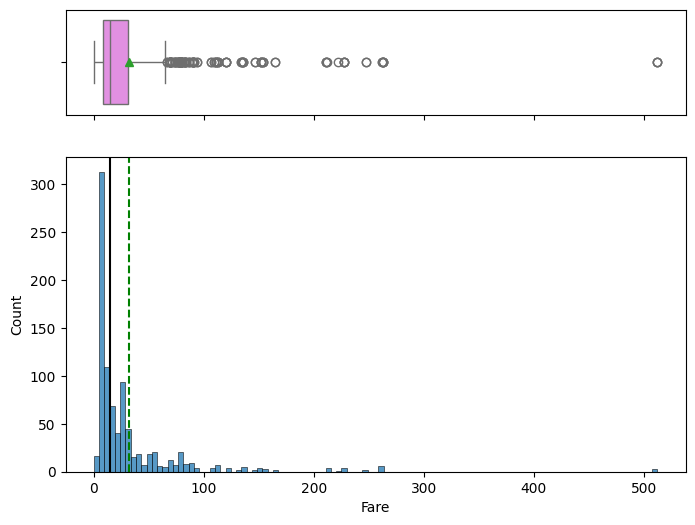

In [ ]:
#visualize Age column histogram and distribution
histogram_boxplot(df,'Fare')

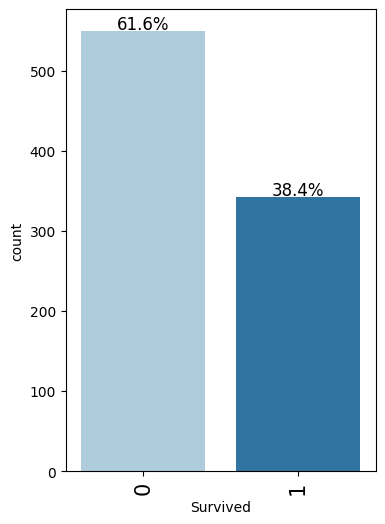

In [ ]:
#visualize Age column bar graph
labeled_barplot(df,'Survived',perc=True)

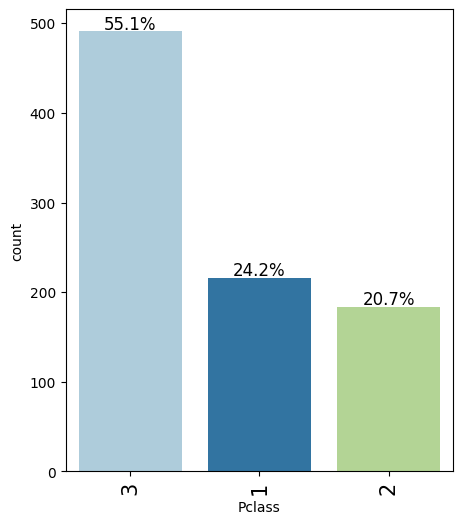

In [ ]:
#visualize Age column bar graph
labeled_barplot(df,'Pclass',perc=True)

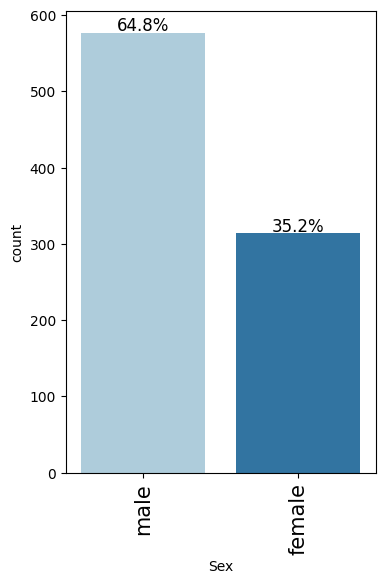

In [ ]:
#visualize Age column bar graph, missing 177 values
labeled_barplot(df,'Sex',perc=True)

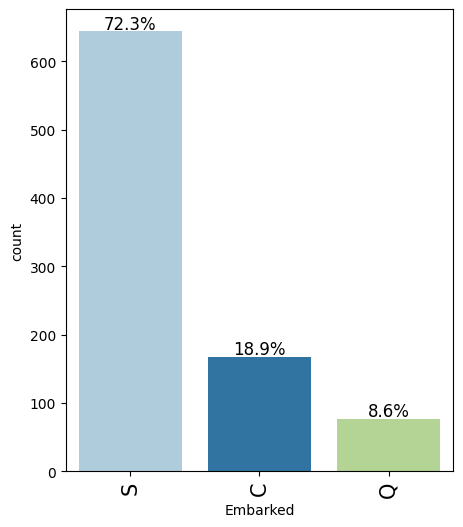

In [ ]:
#visualize Age column bar graph, missing 2 values
labeled_barplot(df,'Embarked',perc=True)

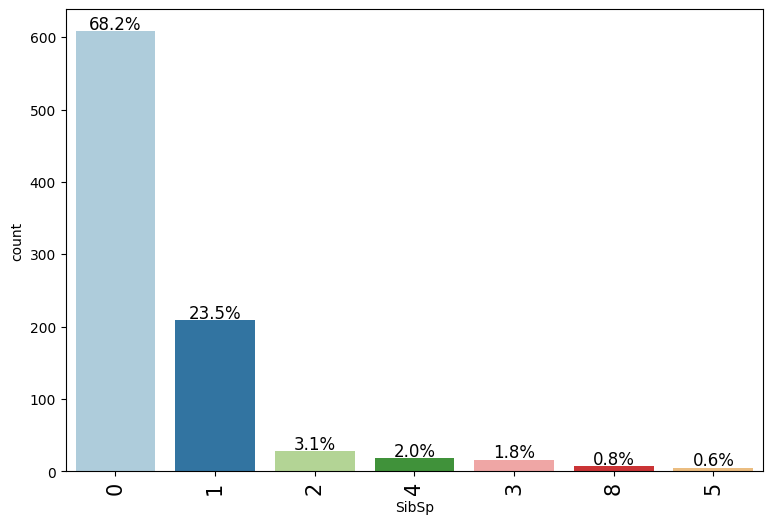

In [ ]:
#visualize Age column bar graph
labeled_barplot(df,'SibSp',perc=True)

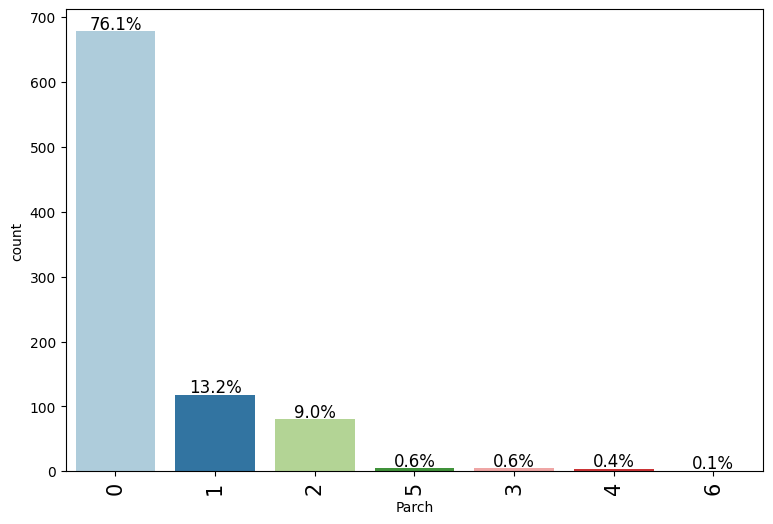

In [ ]:
#visualize Age column bar graph
labeled_barplot(df,'Parch',perc=True)

multivariate

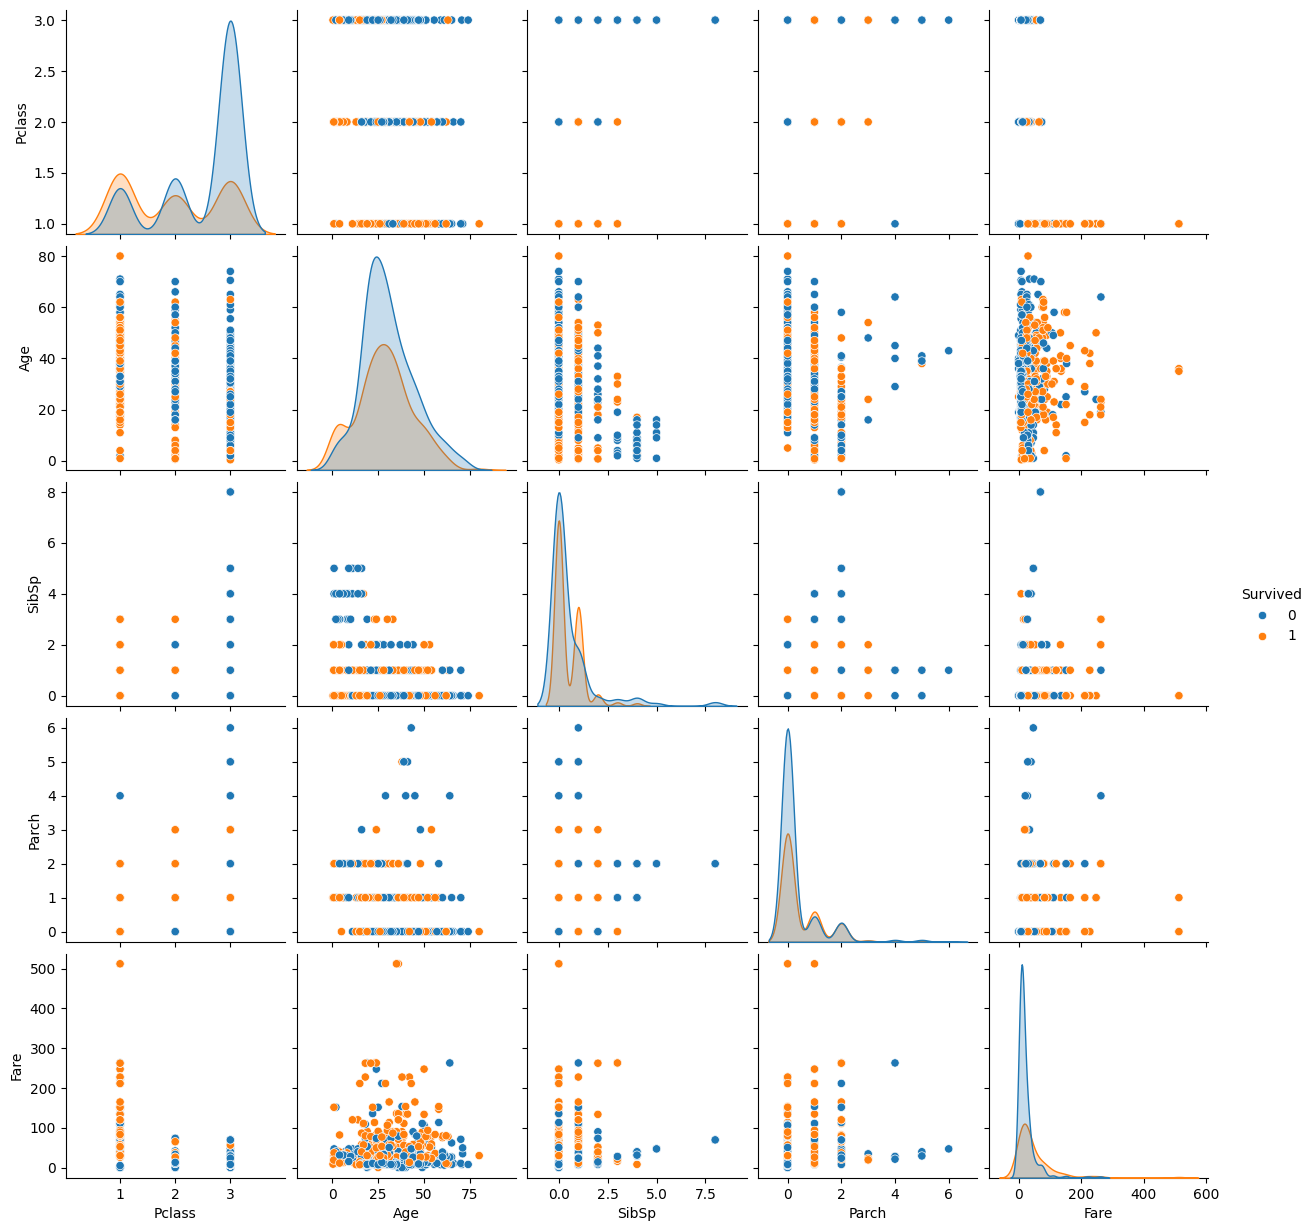

In [ ]:
# plot the variable distributions together and to see if any patterns appear with another variable
sns.pairplot(df,hue = 'Survived', diag_kind='kde');

Some variables that show differences between Survival (variable of interest) are:
* Fare
* Parents and Children traveling together
* Age
* Passenger class

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#define numeric columns
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']

# Return correlation matrix for the numeric columns
correlation_matrix = df[num_cols].corr()

# Display the correlation matrix
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.257,-0.549,0.096,0.160,0.216,1.000


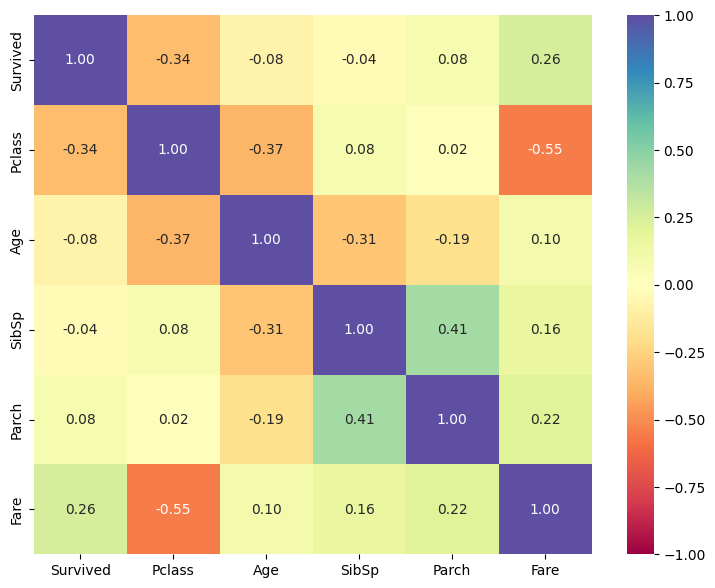

In [ ]:
# plot a heatmap to visualize correlations between variables
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");
plt.show();

Observations:
* There is a negative correlation between Pclass and Fare.  As the Pclass goes up the fare goes down.  This follows our understanding that a higher class ticket, for example a 3rd class ticket, would have a lower fare.  The Pclass is used as a proxy for socioeconomic status, SES, as stated in the data dictionary.

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count, 4))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Survived    0    1  All
Age                    
All       424  290  714
24.0       15   15   30
22.0       16   11   27
36.0       11   11   22
35.0        7   11   18
27.0        7   11   18
30.0       15   10   25
32.0        9    9   18
19.0       16    9   25
18.0       17    9   26
29.0       12    8   20
31.0        9    8   17
4.0         3    7   10
28.0       18    7   25
17.0        7    6   13
34.0        9    6   15
26.0       12    6   18
25.0       17    6   23
40.0        7    6   13
42.0        7    6   13
48.0        3    6    9
33.0        9    6   15
16.0       11    6   17
1.0         2    5    7
38.0        6    5   11
3.0         1    5    6
39.0        9    5   14
21.0       19    5   24
23.0       10    5   15
45.0        7    5   12
50.0        5    5   10
15.0        1    4    5
5.0         0    4    4
49.0        2    4    6
44.0        6    3    9
2.0         7    3   10
52.0        3    3    6
54.0        5    3    8
58.0        2    3    5
14.0        3   

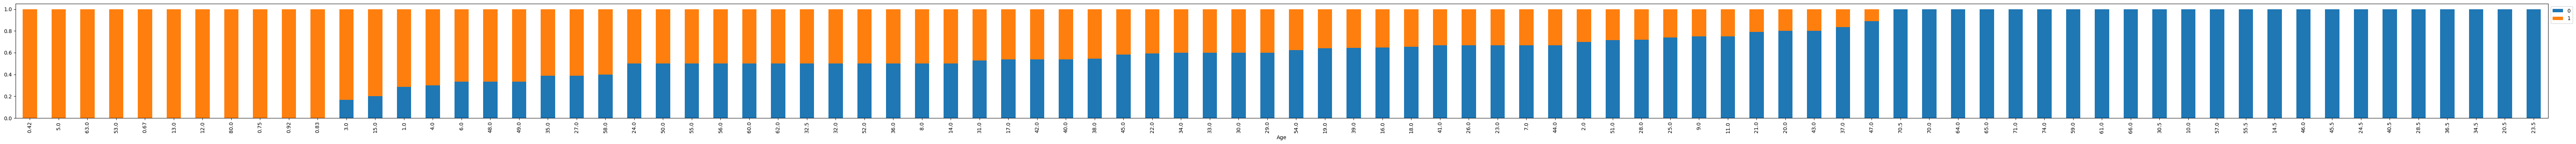

In [ ]:
# visualization of survival status by age
stacked_barplot(df, 'Age', 'Survived')

This is difficult to read but it shows with age groups survived and which did not.

Survived    0    1  All
Pclass                 
All       549  342  891
1          80  136  216
3         372  119  491
2          97   87  184
------------------------------------------------------------------------------------------------------------------------


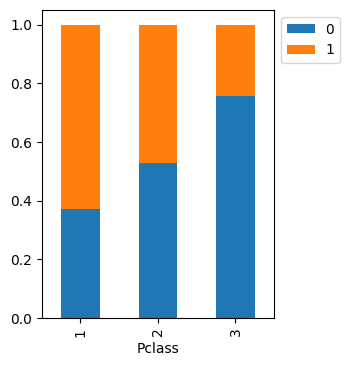

In [ ]:
# visualization of survival status by passenger class
stacked_barplot(df, 'Pclass', 'Survived')

Survived    0    1  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
------------------------------------------------------------------------------------------------------------------------


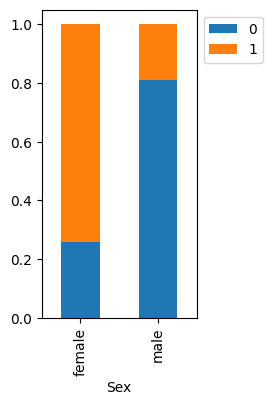

In [ ]:
# visualization of survival status by gender
stacked_barplot(df, 'Sex', 'Survived')

Survived    0    1  All
SibSp                  
All       549  342  891
0         398  210  608
1          97  112  209
2          15   13   28
3          12    4   16
4          15    3   18
5           5    0    5
8           7    0    7
------------------------------------------------------------------------------------------------------------------------


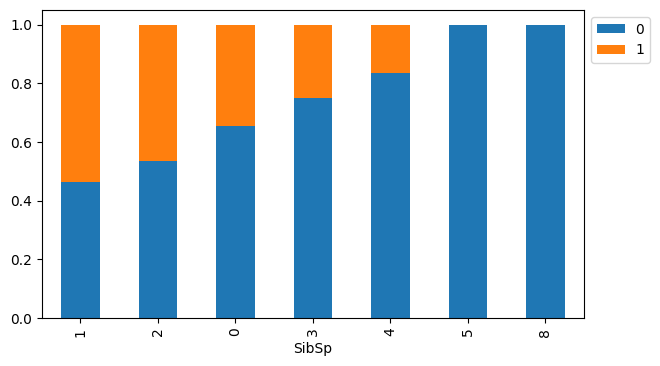

In [ ]:
# visualization of survival status by Siblings and Spouses together
stacked_barplot(df, 'SibSp', 'Survived')

Survived    0    1  All
Parch                  
All       549  342  891
0         445  233  678
1          53   65  118
2          40   40   80
3           2    3    5
5           4    1    5
4           4    0    4
6           1    0    1
------------------------------------------------------------------------------------------------------------------------


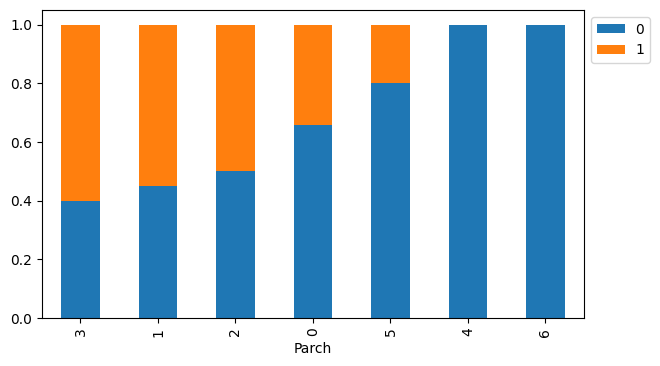

In [ ]:
# visualization of survival status by parents/children together
stacked_barplot(df, 'Parch', 'Survived')

Survived    0    1  All
Fare                   
All       549  342  891
13.0       26   16   42
26.0       16   15   31
7.75       22   12   34
10.5       15    9   24
26.55       7    8   15
7.925      10    8   18
8.05       38    5   43
56.4958     2    5    7
30.0        1    5    6
30.5        1    4    5
23.0        0    4    4
12.475      0    4    4
120.0       0    4    4
19.2583     0    4    4
7.2292     11    4   15
7.8792      0    4    4
26.25       2    4    6
18.75       0    3    3
227.525     1    3    4
7.775      13    3   16
512.3292    0    3    3
15.2458     2    3    5
7.8542     10    3   13
15.5        5    3    8
52.0        4    3    7
83.1583     0    3    3
11.1333     0    3    3
52.5542     0    3    3
26.2875     0    3    3
211.3375    0    3    3
31.3875     1    3    4
7.225       9    3   12
110.8833    1    3    4
86.5        0    3    3
35.5        1    3    4
39.0        1    3    4
53.1        2    3    5
90.0        1    3    4
76.7292     0   

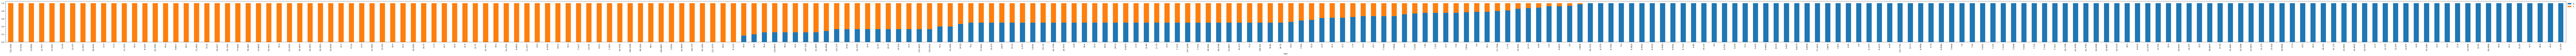

In [ ]:
# visualization of survival status by fare
stacked_barplot(df, 'Fare', 'Survived')

Survived    0    1  All
Embarked               
All       549  340  889
S         427  217  644
C          75   93  168
Q          47   30   77
------------------------------------------------------------------------------------------------------------------------


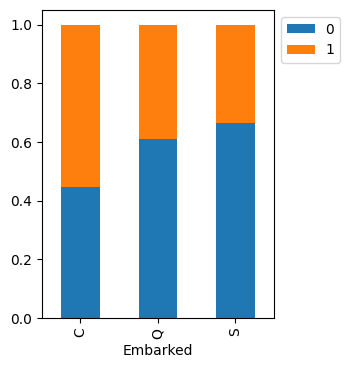

In [ ]:
# visualization of survival status by where passengers embarked
stacked_barplot(df, 'Embarked', 'Survived')

In [ ]:
# ### function to plot distributions wrt target, used in Appendix
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

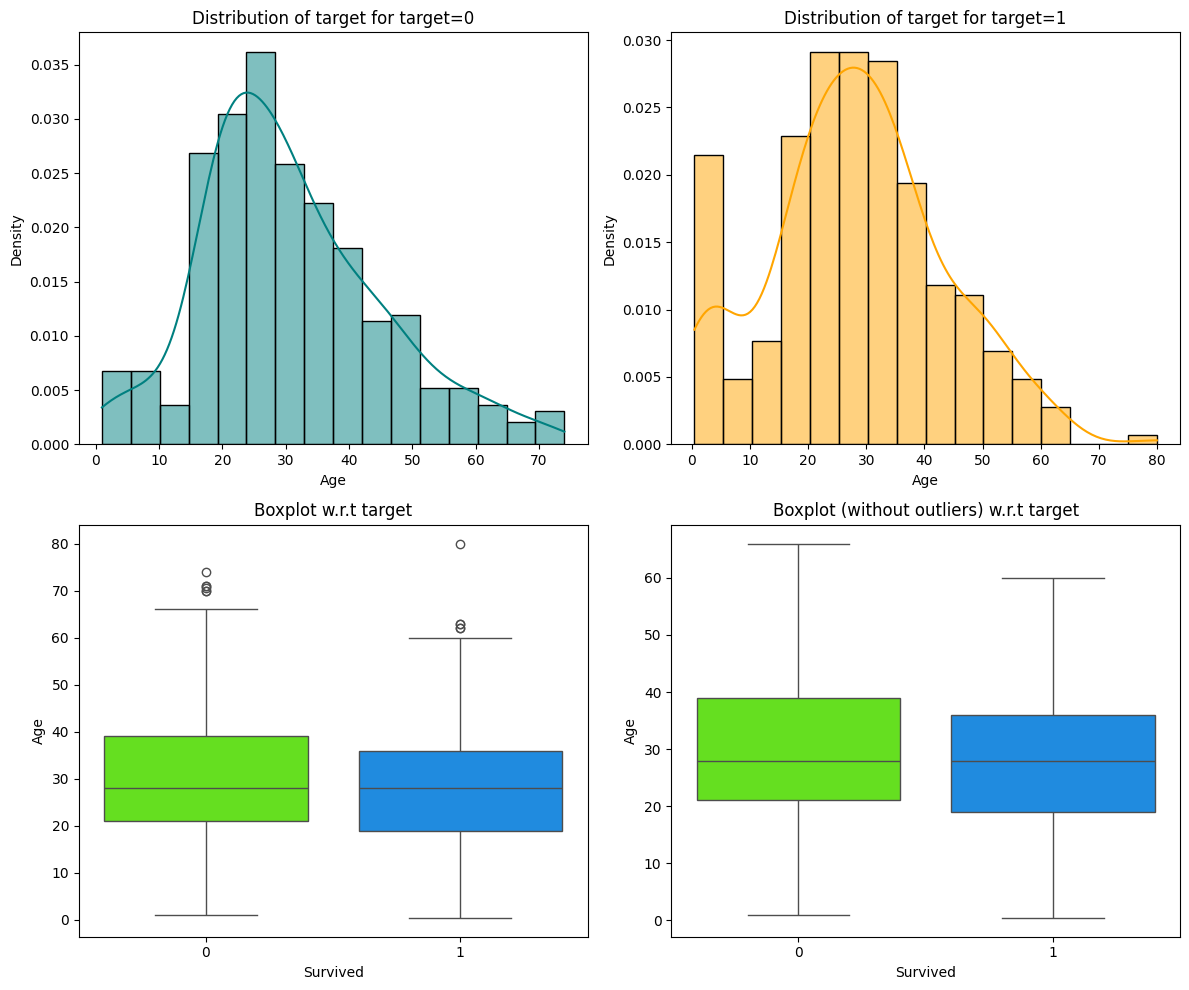

In [ ]:
distribution_plot_wrt_target(df, "Age", "Survived")

There are some outliers present in the Age column.  I may treat this column later in the project.  This column is also missing 177 values, so imputing missing values with the median may be best if this approach is implemented.

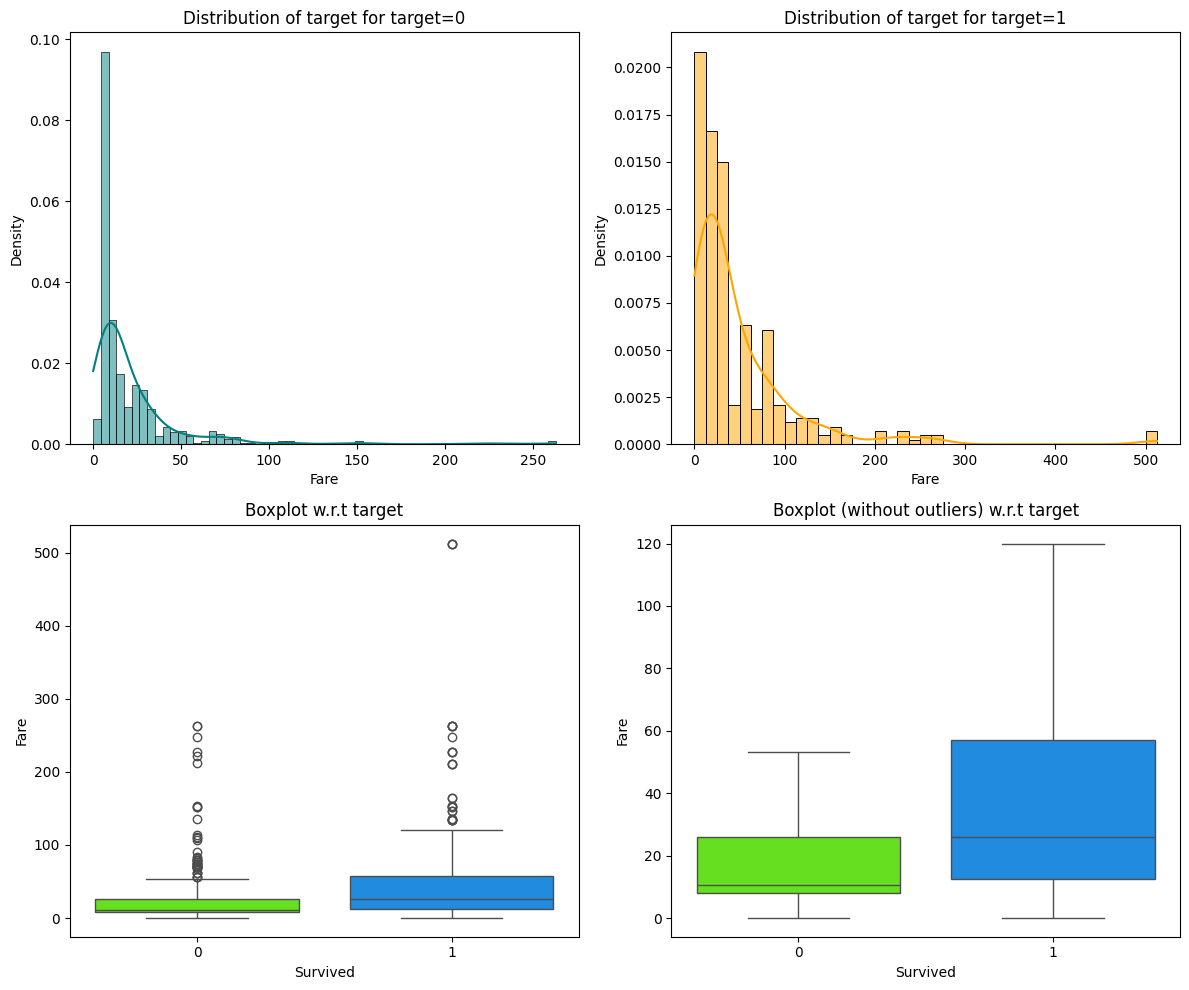

In [ ]:
distribution_plot_wrt_target(df, "Fare", "Survived")

The differnt scales of the 2 graphs are due to the presence of outliers in the Fare column.  I may treat the Fare column later in the project.

In [ ]:
# Define numeric cols and categorical cols
numeric_cols = ['Age','SibSp','Parch', 'Fare']
cat_cols= ['Pclass','Sex','Embarked']

# Convert each column in cat_cols to categorical
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
# verfiy changes to data type of the cat_cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.9 KB


In [ ]:
# save the prepped dataframe with dropped cols to new variable name to
# maintain previous version and be able to call new variable for models below
prepped_data = df.copy()
prepped_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


In [ ]:
# save prepared dataset to a csv file
# Assuming df is your DataFrame
prepped_data.to_csv('prepped_titanic_df.csv', index=False)

# model building pre

In [ ]:
# load data set
#IF NOT RUNNING NOTEBOOK FROM THE BEGINNING
prepped_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic Competition 1/titanic data files 3/prepped_titanic_df.csv')

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic Competition 1/titanic data files 3/test.csv")
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
# function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model 1 decision tree

In [ ]:
# Clear the session data associated with the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 0
model_0_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_0_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


In [ ]:
# Dividing train data into X and y
X = model_0_data.drop(["Survived"], axis=1)
y = model_0_data["Survived"]

# splitting data in train and test sets, 70%, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                  test_size=.30, random_state=1)


print(X_train.shape, X_test.shape)


(623, 7) (268, 7)


Prepare a pipeline

In [ ]:
# Define column names for separate processing:
numeric_cols = ['Age','SibSp','Parch', 'Fare']
categorical_cols= ['Pclass','Sex','Embarked']


In [ ]:
# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #decicion tree can handle categorical columns
])

numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

In [ ]:
# Combine preprocessing steps using ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Create the full pipeline with the classifier:
pipe_dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(criterion = 'gini', random_state=1)
)


In [ ]:
# Fit the pipeline on encoded labels:
pipe_dt.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [ ]:
# Generate predictions on encoded labels:
predictions_train = pipe_dt.predict(X_train)
predictions_test = pipe_dt.predict(X_test)


model metrics

In [ ]:
# Calculate scores on training set:
accuracy_train = accuracy_score(y_train, predictions_train)
precision_train = precision_score(y_train, predictions_train)
recall_train = recall_score(y_train, predictions_train)
f1_train = f1_score(y_train, predictions_train)

# Print the scores:
print("Training Set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

Training Set:
Accuracy: 0.985553772070626
Precision: 0.990990990990991
Recall: 0.9691629955947136
F1-score: 0.9799554565701559


In [ ]:
# Calculate scores on validation set:
accuracy_test = accuracy_score(y_test, predictions_test)
precision_test = precision_score(y_test, predictions_test)
recall_test = recall_score(y_test, predictions_test)
f1_test = f1_score(y_test, predictions_test)

# Print the scores:
print("Validation Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

Validation Set:
Accuracy: 0.753731343283582
Precision: 0.7474747474747475
Recall: 0.6434782608695652
F1-score: 0.6915887850467289


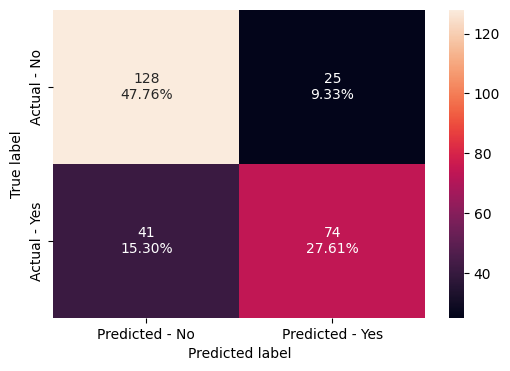

In [ ]:
make_confusion_matrix(pipe_dt,y_test)

In [ ]:
25+41

66

66 misclassified

try model on test data set for submission to competition


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic Competition 1/titanic data files 3/test.csv")
test_data.head(2)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
test_data.shape

(418, 11)

In [ ]:
#copy to new dataframe
# copying data to another varaible to avoid any changes to original data
df_test_1 = test_data.copy()
df_test_1.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
df_test_1.shape

(418, 11)

prep data set for model

In [ ]:
# drop columns
# drop ID column as it is not a determining factor for a model
df_test_1 = df_test_1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
# verfiy dropped columns
df_test_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0,0,7.829,Q
1,3,female,47.000,1,0,7.000,S
2,2,male,62.000,0,0,9.688,Q
3,3,male,27.000,0,0,8.662,S
4,3,female,22.000,1,1,12.287,S


In [ ]:
# Define numeric cols and categorical cols
numeric_cols = ['Age','SibSp','Parch', 'Fare']
cat_cols= ['Pclass','Sex','Embarked']

# Convert each column in cat_cols to categorical
for col in cat_cols:
    df_test_1[col] = df_test_1[col].astype('category')

In [ ]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    category
 2   Age       332 non-null    float64 
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      417 non-null    float64 
 6   Embarked  418 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 14.8 KB


add Passenger ID column back in to dataset

In [ ]:
# first column, CHECK instructions copied code
solution_df = pd.DataFrame(test_data['PassengerId'])
solution_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
#generate predictions
prediction1 = pipe_dt.predict(df_test_1)

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction1})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# second column, CHECK instructions copied code
solution_df['Survived'] = prediction1
solution_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


save as csv for submission

In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Sub1.csv',index=False)

# Model 2 ANN

In [ ]:
com number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 0
model_2_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_2_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


In [ ]:
# Dividing train data into X and y
X = model_2_data.drop(["Survived"], axis=1)
y = model_2_data["Survived"]

# splitting data in train and test sets, 70%, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                  test_size=.30, random_state=1)


print(X_train.shape, X_test.shape)

# Define column names for separate processing:
numeric_cols = ['Age','SibSp','Parch', 'Fare']
categorical_cols= ['Pclass','Sex','Embarked']

# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #decicion tree can handle categorical columns
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combine preprocessing steps using ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Calculate the number of features after preprocessing
num_features = X_train_preprocessed.shape[1]

# Model definition:
model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(num_features,), kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(128, activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(64,activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

#Compile the model
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',  # Binary crossentropy loss for binary classification
                metrics=['accuracy'])  # Accuracy metric

# Fit the pipeline on encoded labels:
# Create a pipeline that includes the preprocessing step before the model
model_2_pipeline = Pipeline([('preprocess', preprocessor),  # Preprocessing steps (including one-hot encoding)
    ('model', KerasClassifier(model=model_2, epochs=100, batch_size=32,
                              random_state=1,verbose=1))
])

# Fit the pipeline
model_2_pipeline.fit(X_train, y_train)

(623, 7) (268, 7)
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6682 - loss: 0.6693
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8601 - loss: 0.3414
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.3022
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.2611
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.2317
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - loss: 0.2038
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9393 - loss: 0.1735
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1506
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.1291
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.1135
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9755 - loss: 0.0971
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('model',
                 KerasClassifier(batch_size=32, epochs=100, model=<Sequential name=sequential_8, built=True>, random_state=1))])

In [ ]:
# # Generate predictions on labels:
# predictions_train = model_2_pipeline.predict(X_train) # Use pipeline to predict

# Access history from 'model' step
# save in history variable to plot below
history_2_train = model_2_pipeline.named_steps['model'].model.history

In [ ]:
predictions_test = model_2_pipeline.predict(X_test)   # Use pipeline to predict
# Access history from 'model' step
# save in history variable to plot below
history_2_test = model_2_pipeline.named_steps['model'].model.history

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


### evaluate model function

In [ ]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)

    # Ensure y_val is encoded as integers for consistency
    #y_val_encoded = LabelEncoder().fit_transform(y_val)  # Assuming string labels

    accuracy_val = accuracy_score(y_val, predictions_val)
    precision_val = precision_score(y_val, predictions_val)
    recall_val = recall_score(y_val, predictions_val)
    f1_val = f1_score(y_val, predictions_val)

    print(f"Validation Set:")
    print(f"Accuracy: {accuracy_val:.4f}")
    print(f"Precision: {precision_val:.4f}")
    print(f"Recall: {recall_val:.4f}")
    print(f"F1-score: {f1_val:.4f}")
    print()


In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
evaluate_model(model_2_pipeline, X_train, y_train, X_test, y_test)

# # how evalute model function defines variables and predictions
#    predictions_train = model.predict(X_train)
#    predictions_val = model.predict(X_val)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation Set:
Accuracy: 0.7612
Precision: 0.8000
Recall: 0.5913
F1-score: 0.6800



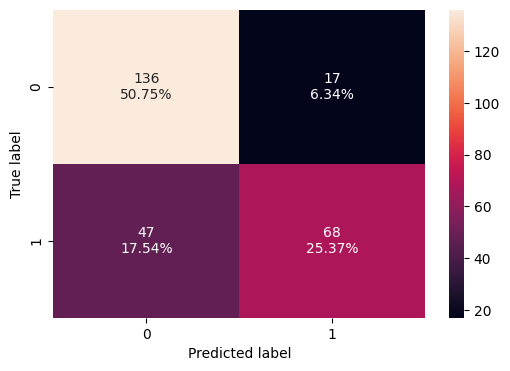

In [ ]:
make_confusion_matrix(y_test, predictions_test)

prep submission

In [ ]:
#copy to new dataframe
# copying data to another varaible to avoid any changes to original data
df_test_2 = test_data.copy()
df_test_2.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
df_test_2.shape

(418, 11)

In [ ]:
# drop columns
# drop ID column as it is not a determining factor for a model
df_test_2 = df_test_2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
# verfiy dropped columns
df_test_2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0,0,7.829,Q
1,3,female,47.000,1,0,7.000,S
2,2,male,62.000,0,0,9.688,Q
3,3,male,27.000,0,0,8.662,S
4,3,female,22.000,1,1,12.287,S


In [ ]:
# first column, CHECK instructions copied code
solution_df_2 = pd.DataFrame(test_data['PassengerId'])
solution_df_2

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
#generate predictions
prediction2 = model_2_pipeline.predict(df_test_2)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# second column, CHECK instructions copied code
solution_df_2['Survived'] = prediction2
solution_df_2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df_2.to_csv('Sub2.csv',index=False)

# Model 3 bigger ANN

In [ ]:
# Clear the session data associated with the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 0
model_3_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_3_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


In [ ]:
# Dividing train data into X and y
X = model_3_data.drop(["Survived"], axis=1)
y = model_3_data["Survived"]

# splitting data in train and test sets, 70%, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                  test_size=.20, random_state=1)


print(X_train.shape, X_test.shape)

# Define column names for separate processing:
numeric_cols = ['Age','SibSp','Parch', 'Fare']
categorical_cols= ['Pclass','Sex','Embarked']

# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #decicion tree can handle categorical columns
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combine preprocessing steps using ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Calculate the number of features after preprocessing
num_features = X_train_preprocessed.shape[1]

# Model definition:
model_3 = Sequential([
    Dense(256, activation='relu', input_shape=(num_features,), kernel_initializer='he_uniform'),
    Dense(128, activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(64,activation='relu',kernel_initializer='he_uniform'),
    Dense(256, activation='relu', input_shape=(num_features,), kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(128, activation='relu',kernel_initializer='he_uniform'),
    Dense(64,activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])


# Define the class weights manually
class_weights = {0: 0.6, 1: 0.4}  # 60:40 ratio to match overall data set ratio

# Define the learning rate
learning_rate = 0.000001

# Create the Adam optimizer instance with the specified learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Define the desired metrics for model compilation
metrics = [accuracy_score]    #Accuracy()

# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='accuarcy', min_delta=0.01, mode='min',patience=5)

#Compile the model
model_3.compile(optimizer=adam_optimizer,
                loss='binary_crossentropy',  # Binary crossentropy loss for binary classification
                metrics=metrics)  # Accuracy metric

# Fit the pipeline on encoded labels:
# Create a pipeline that includes the preprocessing step before the model
model_3_pipeline = Pipeline([
    ('preprocess', preprocessor),  # Preprocessing steps (including one-hot encoding)
    ('model', KerasClassifier(model=model_2, epochs=100, batch_size=64,
                              class_weight=class_weights, random_state=2,  callbacks=[es_cb],
                              verbose=1))
])

# Fit the pipeline
model_3_pipeline.fit(X_train, y_train)

(712, 7) (179, 7)
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0098  
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0104 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0102 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0101 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9885 - loss: 0.0102
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0100 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0100 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0103 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9865 - loss: 0.0108 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9885 - loss: 0.0110 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9871 - loss: 0.0102 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('model',
                 KerasClassifier(batch_size=64, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7c271dfdae30>], class_weight={0: 0.6, 1: 0.4}, epochs=100, model=<Sequential name=sequential_8, built=True>, random_state=2))])

In [ ]:
# Access history from 'model' step
# save in history variable to plot below
history_3_train = model_3_pipeline.named_steps['model'].model.history

In [ ]:
predictions_test_3 = model_3_pipeline.predict(X_test)   # Use pipeline to predict
# Access history from 'model' step
# save in history variable to plot below
history_3_test = model_3_pipeline.named_steps['model'].model.history

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
evaluate_model(model_3_pipeline, X_train, y_train, X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Validation Set:
Accuracy: 0.7542
Precision: 0.8085
Recall: 0.5205
F1-score: 0.6333



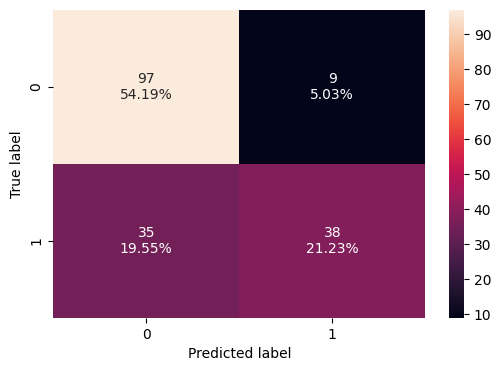

In [ ]:
make_confusion_matrix(y_test, predictions_test_3)

In [ ]:
#copy to new dataframe
# copying data to another varaible to avoid any changes to original data
df_test_3 = test_data.copy()
df_test_3.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
df_test_3.shape

(418, 11)

In [ ]:
# drop columns
# drop ID column as it is not a determining factor for a model
df_test_3 = df_test_3.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
# verfiy dropped columns
df_test_3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0,0,7.829,Q
1,3,female,47.000,1,0,7.000,S
2,2,male,62.000,0,0,9.688,Q
3,3,male,27.000,0,0,8.662,S
4,3,female,22.000,1,1,12.287,S


In [ ]:
# first column, CHECK instructions copied code
solution_df_3 = pd.DataFrame(test_data['PassengerId'])
solution_df_3

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
#generate predictions
prediction3 = model_3_pipeline.predict(df_test_3)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# second column, CHECK instructions copied code
solution_df_3['Survived'] = prediction3
solution_df_3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df_3.to_csv('Sub3.csv',index=False)

# Model 4 XGB random search and minimal features (less noisy data)

In [ ]:
# Clear the session data associated with the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 0
model_4_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_4_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


In [ ]:
# drop ID column as it is not a determining factor for a model
model_4_data = model_4_data.drop(['Age','Fare','SibSp','Embarked'],axis=1)
# verfiy dropped columns
model_4_data.head()

,Survived,Pclass,Sex,Parch
0,0,3,male,0
1,1,1,female,0
2,1,3,female,0
3,1,1,female,0
4,0,3,male,0


In [ ]:
# Dividing train data into X and y
X = model_4_data.drop(["Survived"], axis=1)
y = model_4_data["Survived"]

# splitting data in train and test sets, 75%, 25%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                  test_size=.25, random_state=1)


print(X_train.shape, X_test.shape)

# Define column names for separate processing:
numeric_cols = ['Parch']
categorical_cols= ['Pclass','Sex']

# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', RobustScaler())
# ])

# Combine preprocessing steps using ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Calculate the number of features after preprocessing
num_features = X_train_preprocessed.shape[1]

# Random Search CV
param_distributions = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.05, 0.1, 0.15],
    "xgb__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "xgb__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "xgb__gamma": [0, 1, 2, 3],
    "xgb__min_child_weight": [1, 3, 5, 7],
    'xgb__reg_alpha': [0, 0.1, 0.5, 1],
    "xgb__reg_lambda": [0, 1, 3, 5]

}


# Define the class weights manually
class_weights = {0: 0.616, 1: 0.384}  # 60:40 ratio to match overall data set ratio. ###DO THIS MORE ACCURATELY


# Create a stratified K-fold cross-validator for 10 splits, shuffling data for each split
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)  # Ensures balanced class representation in each fold


# Initialize RandomizedSearchCV for hyperparameter tuning with XGBoost pipeline
random_search_xgb_model_4 = RandomizedSearchCV(
    estimator=XGBClassifier(class_weight=class_weights, random_state=2),
    param_distributions=param_distributions,
    n_iter=100,
    cv=skf,
    error_score='raise',
    scoring="accuracy",  # Use F1-score as the evaluation metric
    verbose=2
)

# Create the complete pipeline with preprocessing and XGBoost:
random_search_xgb_model_4_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", random_search_xgb_model_4)  # Use the RandomizedSearchCV object directly
])

# Fit the RandomizedSearchCV object to find optimal hyperparameters
random_search_xgb_model_4_pipeline.fit(X_train, y_train)


(668, 3) (223, 3)
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END xgb__colsample_bytree=0.9, xgb__gamma=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__min_child_weight=5, xgb__n_estimators=300, xgb__reg_alpha=1, xgb__reg_lambda=1, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.9, xgb__gamma=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__min_child_weight=5, xgb__n_estimators=300, xgb__reg_alpha=1, xgb__reg_lambda=1, xgb__subsample=0.8; total time=   0.3s
[CV] END xgb__colsample_bytree=0.9, xgb__gamma=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__min_child_weight=5, xgb__n_estimators=300, xgb__reg_alpha=1, xgb__reg_lambda=1, xgb__subsample=0.8; total time=   0.7s
[CV] END xgb__colsample_bytree=0.9, xgb__gamma=3, xgb__learning_rate=0.05, xgb__max_depth=3, xgb__min_child_weight=5, xgb__n_estimators=300, xgb__reg_alpha=1, xgb__reg_lambda=1, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.9, xgb__gamma=3,

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex'])])),
                ('xgb',
                 RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                                    error_score='raise',
                                    estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            class_weight={0:...
                                    param_distributions={'xgb__colsample_bytree': [0.6,
                                                                                   0.7,
                                                                                   0.8,
                                                                                   0.9,
                                                                                   1.0],
                                                         'xgb__gamma': [0, 1, 2,
                                                                        3],
                                                         'xgb__learning_rate': [0.05,
                                                                                0.1,
                                                                                0.15],
                                                         'xgb__max_depth': [3,
                                                                            5,
                                                                            7],
                                                         'xgb__min_child_weight': [1,
                                                                                   3,
                                                                                   5,
                                                                                   7],
                                                         'xgb__n_estimators': [100,
                                                                               200,
                                                                               300],
                                                         'xgb__reg_alpha': [0,
                                                                            0.1,
                                                                            0.5,
                                                                            1],
                                                         'xgb__reg_lambda': [0,
                                                                             1,
                                                                             3,
                                                                             5],
                                                         'xgb__subsample': [0.6,
                                                                            0.7,
                                                                            0.8,
                                                                            0.9,
                                                                            1.0]},
                                    scoring='accuracy', verbose=2))])

In [ ]:
# Get the best parameters from the random search
# Access the 'xgb' step (RandomizedSearchCV) within the pipeline
best_params = random_search_xgb_model_4_pipeline.named_steps['xgb'].best_params_

#display best parameters found
print("Best parameters from Random Search CV model 4tuned:", best_params)

Best parameters from Random Search CV model 4tuned: {'xgb__subsample': 0.8, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 1, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 5, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.05, 'xgb__gamma': 3, 'xgb__colsample_bytree': 0.9}


In [ ]:
# Create a new XGBoost model with the best parameters
best_xgb_model_4 = XGBClassifier(**best_params)

# Transform the test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Fit the best model to the preprocessed test data
best_xgb_model_4.fit(X_test_preprocessed, y_test)

# Make predictions on the test data
# (ensure you're using the preprocessed test data here as well)
y_pred_test = best_xgb_model_4.predict(X_test_preprocessed)

In [ ]:
# Generate predictions on encoded labels:
predictions_train = best_xgb_model_4.predict(X_train_preprocessed)
predictions_test = best_xgb_model_4.predict(X_test_preprocessed)


In [ ]:
# Calculate scores on training set:
accuracy_train = accuracy_score(y_train, predictions_train)
precision_train = precision_score(y_train, predictions_train)
recall_train = recall_score(y_train, predictions_train)
f1_train = f1_score(y_train, predictions_train)

# Print the scores:
print("Training Set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

Training Set:
Accuracy: 0.7874251497005988
Precision: 0.7253218884120172
Recall: 0.6842105263157895
F1-score: 0.7041666666666667


In [ ]:
# Calculate scores on validation set:
accuracy_test = accuracy_score(y_test, predictions_test)
precision_test = precision_score(y_test, predictions_test)
recall_test = recall_score(y_test, predictions_test)
f1_test = f1_score(y_test, predictions_test)

# Print the scores:
print("Validation Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

Validation Set:
Accuracy: 0.7847533632286996
Precision: 0.7901234567901234
Recall: 0.6736842105263158
F1-score: 0.7272727272727273


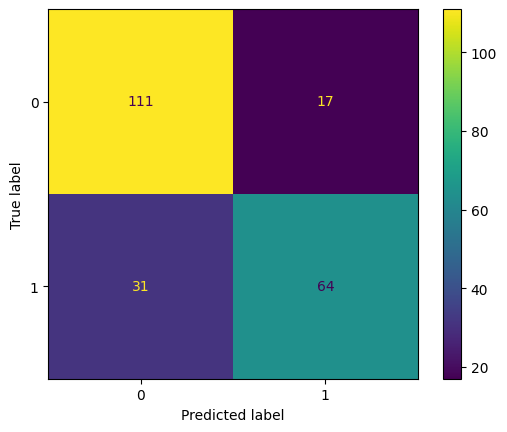

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
predictions = best_xgb_model_4.predict(X_test_preprocessed)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
31+17

48

prep data set for model

In [ ]:
#copy to new dataframe
# copying data to another varaible to avoid any changes to original data
df_test_4 = test_data.copy()
df_test_4.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
df_test_4.shape

(418, 11)

In [ ]:
# drop columns
# drop ID column as it is not a determining factor for a model
df_test_4 = df_test_4.drop(['PassengerId','Name','Ticket','Cabin','Age','SibSp',
                        'Embarked'],axis=1)               ####FORGOT FARE!!!!!!!!! BUT WORKED ANYWAY
# verfiy dropped columns
df_test_4.head()

,Pclass,Sex,Parch,Fare
0,3,male,0,7.829
1,3,female,0,7.000
2,2,male,0,9.688
3,3,male,0,8.662
4,3,female,1,12.287


In [ ]:
# first column, CHECK instructions copied code
solution_df_4 = pd.DataFrame(test_data['PassengerId'])
solution_df_4

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:

# Make predictions on the final test data
y_pred_final = best_xgb_model_4.predict(df_test_final_preprocessed)


In [ ]:
# Transform the test data using the fitted preprocessor
df_test_4_preprocessed = preprocessor.transform(df_test_4)

In [ ]:
#generate predictions
# (ensure you're using the preprocessed test data here as well)
prediction4 = best_xgb_model_4.predict(df_test_4_preprocessed)


In [ ]:
# second column, CHECK instructions copied code
solution_df_4['Survived'] = prediction4
solution_df_4

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df_4.to_csv('Sub4.csv',index=False)

# Model 5 XGB grid search and minimal features (all as categorical)

In [ ]:
# Clear the session data associated with the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 0
model_5_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_5_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


In [ ]:
# drop ID column as it is not a determining factor for a model
model_5_data = model_5_data.drop(['Age','Fare','SibSp','Embarked'],axis=1)
# verfiy dropped columns
model_5_data.head()

,Survived,Pclass,Sex,Parch
0,0,3,male,0
1,1,1,female,0
2,1,3,female,0
3,1,1,female,0
4,0,3,male,0


In [ ]:
# Dividing train data into X and y
X = model_5_data.drop(["Survived"], axis=1)
y = model_5_data["Survived"]

# splitting data in train and test sets, 75%, 25%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                  test_size=.25, random_state=1)


print(X_train.shape, X_test.shape)

# Define column names for separate processing:
#numeric_cols = []

#one-hot encode column to represent its categorical values as binary features,
#preventing any implicit ordinality
categorical_cols= ['Pclass','Sex','Parch']

# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Calculate the number of features after preprocessing
num_features = X_train_preprocessed.shape[1]

# these 128000 parameters were used and the fit execution crashed after over 6 hours on T4 GPUs
# # Define the parameter grid for Grid Search CV
# param_grid = {
#     "xgb__n_estimators": [100, 200, 300, 501, 50],
#     "xgb__max_depth": [3, 5, 7, 15],
#     "xgb__learning_rate": [0.001, 0.05, 0.01, 0.1, 0.15],
#     "xgb__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "xgb__colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
#     "xgb__gamma": [0, 1, 2, 3],
#     "xgb__min_child_weight": [1, 3, 5, 7],
#     'xgb__reg_alpha': [0, 0.1, 0.5, 1],
#     "xgb__reg_lambda": [0, 1, 3, 5],
# }

# Define the parameter grid for Grid Search CV
param_grid = {
    "xgb__n_estimators": [100, 200, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.1, 0.3],
    "xgb__subsample": [0.8, 0.9],
    "xgb__colsample_bytree": [0.8, 0.9],
    # ... (consider removing less sensitive parameters)
}

# Define the class weights manually
class_weights = {0: 0.616, 1: 0.384}  # 60:40 ratio to match overall data set ratio. ###DO THIS MORE ACCURATELY

# Create a stratified K-fold cross-validator for 10 splits, shuffling data for each split
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)  # Ensures balanced class representation in each fold

# Initialize RandomizedSearchCV for hyperparameter tuning with XGBoost pipeline
grid_search_xgb_model_5 = GridSearchCV(
    estimator=XGBClassifier(class_weight=class_weights, random_state=2),
    param_grid=param_grid,
    cv=skf,
    error_score='raise',
    scoring="accuracy",  # Use F1-score as the evaluation metric
    verbose=2
)

# Create the complete pipeline with preprocessing and XGBoost:
grid_search_xgb_model_5_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", grid_search_xgb_model_5)  # Use the RandomizedSearchCV object directly
])

# Fit the RandomizedSearchCV object to find optimal hyperparameters
grid_search_xgb_model_5_pipeline.fit(X_train, y_train)


(668, 3) (223, 3)
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.0s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.0s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.0s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.0s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.0s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.0s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_d

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Parch'])])),
                ('xgb',
                 GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                              error_score='raise',
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      class_weight={...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...),
                              param_grid={'xgb__colsample_bytree': [0.8, 0.9],
                                          'xgb__learning_rate': [0.01, 0.1,
                                                                 0.3],
                                          'xgb__max_depth': [3, 5, 7],
                                          'xgb__n_estimators': [100, 200, 300],
                                          'xgb__subsample': [0.8, 0.9]},
                              scoring='accuracy', verbose=2))])

In [ ]:
# Get the best parameters from the grid search
# Access the 'xgb' step (GridSearchCV) within the pipeline
best_params = grid_search_xgb_model_5_pipeline.named_steps['xgb'].best_params_

#display best parameters found
print("Best parameters from Grid Search CV model 5 tuned:", best_params)

Best parameters from Grid Search CV model 5 tuned: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}


In [ ]:
# Create a new XGBoost model with the best parameters
best_xgb_model_5 = XGBClassifier(**best_params)

# Transform the test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Fit the best model to the preprocessed test data
best_xgb_model_5.fit(X_test_preprocessed, y_test)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Generate predictions on encoded labels:
predictions_train = best_xgb_model_5.predict(X_train_preprocessed)
predictions_test = best_xgb_model_5.predict(X_test_preprocessed)

# # Make predictions on the test data
# # (ensure you're using the preprocessed test data here as well)
# y_pred_test = best_xgb_model_5.predict(X_test_preprocessed)


In [ ]:
# Calculate scores on training set:
accuracy_train = accuracy_score(y_train, predictions_train)
precision_train = precision_score(y_train, predictions_train)
recall_train = recall_score(y_train, predictions_train)
f1_train = f1_score(y_train, predictions_train)

# Print the scores:
print("Training Set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

Training Set:
Accuracy: 0.8068862275449101
Precision: 0.8138297872340425
Recall: 0.6194331983805668
F1-score: 0.703448275862069


In [ ]:
# Calculate scores on validation set:
accuracy_test = accuracy_score(y_test, predictions_test)
precision_test = precision_score(y_test, predictions_test)
recall_test = recall_score(y_test, predictions_test)
f1_test = f1_score(y_test, predictions_test)

# Print the scores:
print("Validation Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

Validation Set:
Accuracy: 0.7937219730941704
Precision: 0.8656716417910447
Recall: 0.6105263157894737
F1-score: 0.7160493827160493


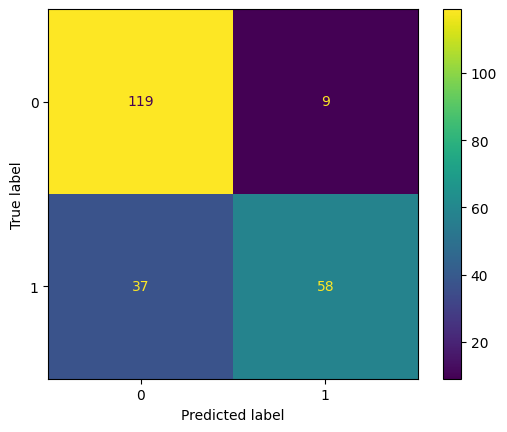

In [ ]:
# # Generate predictions
# predictions = best_xgb_model_5predict(X_test_preprocessed)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
37+9

46

In [ ]:
original_column_names = X_train.columns
original_column_names

Index(['Pclass', 'Sex', 'Parch'], dtype='object')

In [ ]:
# Assuming your pipeline is named 'preprocessor' and has been fitted
categorical_transformer = preprocessor.transformers_[0][1]
encoder = categorical_transformer.named_steps['onehot']


original_column_names = X_train.columns
# 1. Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(original_column_names)

# 2. Calculate aggregated feature importances
feature_importances = best_xgb_model_5.feature_importances_
df1 = pd.DataFrame({'Feature': encoded_feature_names, 'Importance': feature_importances})
df1['Original Feature'] = df1['Feature'].str.split('_').str[0]
aggregated_importances = df1.groupby('Original Feature')['Importance'].sum()

# 3. Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': aggregated_importances.index, 'Importance': aggregated_importances.values})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,Sex,0.618
1,Pclass,0.290
0,Parch,0.092


Observations:
* From this modified dataset with only categorical variables, the important features are:
  * Sex
  * Passenger Class
  * If the passenger was a parent or a child traveling with parent/child
As was customary at the time, the women and children would have been saved first, leading to an elevated number of women and children surviving.

I will use this to inform our next model where we modify the 'Age' column to determine how this feature may be interacting with others to improve the model performance.

In [ ]:
#copy to new dataframe
# copying data to another varaible to avoid any changes to original data
df_test_5 = test_data.copy()
df_test_5.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
df_test_5.shape

(418, 11)

In [ ]:
# drop columns
# drop ID column as it is not a determining factor for a model
df_test_5 = df_test_5.drop(['PassengerId','Name','Ticket','Cabin','Age','Fare','SibSp',
                        'Embarked'],axis=1)
# verfiy dropped columns
df_test_5.head()

,Pclass,Sex,Parch
0,3,male,0
1,3,female,0
2,2,male,0
3,3,male,0
4,3,female,1


In [ ]:
# first column, CHECK instructions copied code
solution_df_5 = pd.DataFrame(test_data['PassengerId'])
solution_df_5

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
# Transform the test data using the fitted preprocessor
df_test_5_preprocessed = preprocessor.transform(df_test_5)

In [ ]:
#generate predictions
# (ensure you're using the preprocessed test data here as well)
prediction5 = best_xgb_model_5.predict(df_test_5_preprocessed)


In [ ]:
# second column, CHECK instructions copied code
solution_df_5['Survived'] = prediction5
solution_df_5

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df_5.to_csv('Sub5.csv',index=False)

# Model 6 (all categorical with custom column added)

In [ ]:
# Clear the session data associated with the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 0
model_6_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_6_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


## Explore and Add Age Category column

In [ ]:
# Create a new column 'Age_Category'
model_6_data['Age_Category'] = pd.cut(model_6_data['Age'], bins=[0, 18, float('inf')], labels=['Child', 'Adult'])
model_6_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
0,0,3,male,22.000,1,0,7.250,S,Adult
1,1,1,female,38.000,1,0,71.283,C,Adult
2,1,3,female,26.000,0,0,7.925,S,Adult
3,1,1,female,35.000,1,0,53.100,S,Adult
4,0,3,male,35.000,0,0,8.050,S,Adult


In [ ]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 800)

# Check for missing values only in the 'Age' column.   177 missing values of the 891 observations
missing_age_rows = model_6_data[model_6_data['Age'].isnull()]

# Display rows with missing values in the 'Age' column
missing_age_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.458,Q
17,1,2,male,NaN,0,0,13.000,S
19,1,3,female,NaN,0,0,7.225,C
26,0,3,male,NaN,0,0,7.225,C
28,1,3,female,NaN,0,0,7.879,Q
29,0,3,male,NaN,0,0,7.896,S
31,1,1,female,NaN,1,0,146.521,C
32,1,3,female,NaN,0,0,7.750,Q
36,1,3,male,NaN,0,0,7.229,C
42,0,3,male,NaN,0,0,7.896,C


### add categorical 'Age' column

In [ ]:
# Create a new column 'Age_Category'
model_6_data['Age_Category'] = pd.cut(model_6_data['Age'], bins=[0, 18, float('inf')], labels=['Child', 'Adult'])
model_6_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
0,0,3,male,22.000,1,0,7.250,S,Adult
1,1,1,female,38.000,1,0,71.283,C,Adult
2,1,3,female,26.000,0,0,7.925,S,Adult
3,1,1,female,35.000,1,0,53.100,S,Adult
4,0,3,male,35.000,0,0,8.050,S,Adult


In [ ]:
# Check for missing values only in the 'Age' column
missing_age_category_rows = model_6_data[model_6_data['Age_Category'].isnull()]

# Display rows with missing values in the 'Age' column
missing_age_category_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
5,0,3,male,NaN,0,0,8.458,Q,NaN
17,1,2,male,NaN,0,0,13.000,S,NaN
19,1,3,female,NaN,0,0,7.225,C,NaN
26,0,3,male,NaN,0,0,7.225,C,NaN
28,1,3,female,NaN,0,0,7.879,Q,NaN
29,0,3,male,NaN,0,0,7.896,S,NaN
31,1,1,female,NaN,1,0,146.521,C,NaN
32,1,3,female,NaN,0,0,7.750,Q,NaN
36,1,3,male,NaN,0,0,7.229,C,NaN
42,0,3,male,NaN,0,0,7.896,C,NaN


In [ ]:
sorted_data = missing_age_category_rows.sort_values(by='Survived', ascending=False)
sorted_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
274,1,3,female,NaN,0,0,7.750,Q,NaN
669,1,1,female,NaN,1,0,52.000,S,NaN
17,1,2,male,NaN,0,0,13.000,S,NaN
444,1,3,male,NaN,0,0,8.113,S,NaN
186,1,3,female,NaN,1,0,15.500,Q,NaN
740,1,1,male,NaN,0,0,30.000,S,NaN
198,1,3,female,NaN,0,0,7.750,Q,NaN
596,1,2,female,NaN,0,0,33.000,S,NaN
727,1,3,female,NaN,0,0,7.737,Q,NaN
241,1,3,female,NaN,1,0,15.500,Q,NaN


There is an observation that appears to repeat, a female, 69.5 paid fare, that is traveling with 8 siblings and 2 parents that does not survive.  This is something I want to look at more closely.

In [ ]:
# Filter rows based on the given conditions
filtered_data_8 = missing_age_category_rows[ (missing_age_category_rows['SibSp'] == 8) & (missing_age_category_rows['Parch'] == 2)]
# (missing_age_category_rows['Fare'] == 69.550) &


filtered_data_8

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
159,0,3,male,NaN,8,2,69.550,S,NaN
180,0,3,female,NaN,8,2,69.550,S,NaN
201,0,3,male,NaN,8,2,69.550,S,NaN
324,0,3,male,NaN,8,2,69.550,S,NaN
792,0,3,female,NaN,8,2,69.550,S,NaN
846,0,3,male,NaN,8,2,69.550,S,NaN
863,0,3,female,NaN,8,2,69.550,S,NaN


RIP sweet family.  7 of the 8 in this family appear not to have survived.  It is a combination of males and females with unknown ages, all 3rd class passengers that paid 69.550 for their fare, and embarking from Cherbourg.

## create model

In [ ]:
model_6_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
0,0,3,male,22.000,1,0,7.250,S,Adult
1,1,1,female,38.000,1,0,71.283,C,Adult
2,1,3,female,26.000,0,0,7.925,S,Adult
3,1,1,female,35.000,1,0,53.100,S,Adult
4,0,3,male,35.000,0,0,8.050,S,Adult


In [ ]:
# # Create a new column 'Age_Category'      #### IF NOT RUN EARLIER
# model_6_data['Age_Category'] = pd.cut(model_6_data['Age'], bins=[0, 18, float('inf')], labels=['Child', 'Adult'])
# model_6_data.head()

In [ ]:
# drop ID column as it is not a determining factor for a model
model_6_data = model_6_data.drop(['Age','Fare','SibSp','Embarked'],axis=1)      #NOTE: try keeping SibSp?
# verfiy dropped columns
model_6_data.head()

,Survived,Pclass,Sex,Parch,Age_Category
0,0,3,male,0,Adult
1,1,1,female,0,Adult
2,1,3,female,0,Adult
3,1,1,female,0,Adult
4,0,3,male,0,Adult


In [ ]:
# Dividing train data into X and y
X = model_6_data.drop(["Survived"], axis=1)
y = model_6_data["Survived"]

# splitting data in train and test sets, 70%, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                  test_size=.20, random_state=1)


print(X_train.shape, X_test.shape)

# Define column names for separate processing:
#numeric_cols = ['Age','SibSp','Parch', 'Fare']
categorical_cols= ['Pclass','Sex','Parch','Age_Category']     #'Embarked',
preprocess_cat_cols= ['Sex','Age_Category']

# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', RobustScaler())
# ])

# Combine preprocessing steps using ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        #('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, preprocess_cat_cols)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Calculate the number of features after preprocessing
num_features = X_train_preprocessed.shape[1]
print(num_features)

# Model definition:
model_6 = Sequential([
    Dense(128, input_shape=(num_features,),
          kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)),  # Add L2 regularization
    LeakyReLU(), # Use LeakyReLU as a separate layer
    BatchNormalization(),
    Dense(64, kernel_initializer='he_normal',
          kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(), # Use LeakyReLU as a separate layer
    BatchNormalization(),
    Dense(32, kernel_initializer='he_normal',
          kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(), # Use LeakyReLU as a separate layer
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])


# Define the class weights manually
class_weights = {0: 0.616, 1: 0.384}   # 60:40 ratio to match overall data set ratio class_weights = {0: 0.616, 1: 0.384}

# Define the learning rate
learning_rate = 0.001

# Create the Adam optimizer instance with the specified learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Define the desired metrics for model compilation
metrics = ['accuracy']    #Accuracy()

# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, mode='max',patience=5)

#Compile the model
model_6.compile(optimizer=adam_optimizer,
                loss='binary_crossentropy',  # Binary crossentropy loss for binary classification
                metrics=metrics)

# Fit the pipeline on encoded labels:
# Create a pipeline that includes the preprocessing step before the model
model_6_pipeline = Pipeline([
    ('preprocess', preprocessor),  # Preprocessing steps (including one-hot encoding)
    ('model', KerasClassifier(model=model_6, epochs=25, batch_size=64,
                              class_weight=class_weights, random_state=2,  callbacks=[es_cb],
                              verbose=1))
])


# build model prior to getting summary
model_6.build()
# get model summary to verify
model_6.summary()



(712, 4) (179, 4)
5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 11,585 (45.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Fit the pipeline
model_6_pipeline.fit(X_train, y_train)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.6252 - loss: 5.0716
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 4.6778 
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 4.4832 
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 4.3019 
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 4.1164 
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 3.9399 
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 3.7742 
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 3.6147 


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age_Category'])])),
                ('model',
                 KerasClassifier(batch_size=64, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7fb0d05f0040>], class_weight={0: 0.616, 1: 0.384}, epochs=25, model=<Sequential name=sequential_1, built=True>, random_state=2))])

metrics

In [ ]:
# Access history from 'model' step
# save in history variable to plot below
history_6_train = model_6_pipeline.named_steps['model'].model.history

In [ ]:
predictions_test_6 = model_6_pipeline.predict(X_test)   # Use pipeline to predict
# Access history from 'model' step
# save in history variable to plot below
history_3_test = model_6_pipeline.named_steps['model'].model.history

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step


In [ ]:
# Transform the test data using the fitted preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
evaluate_model(model_6_pipeline, X_train, y_train, X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Validation Set:
Accuracy: 0.7430
Precision: 0.8293
Recall: 0.4658
F1-score: 0.5965



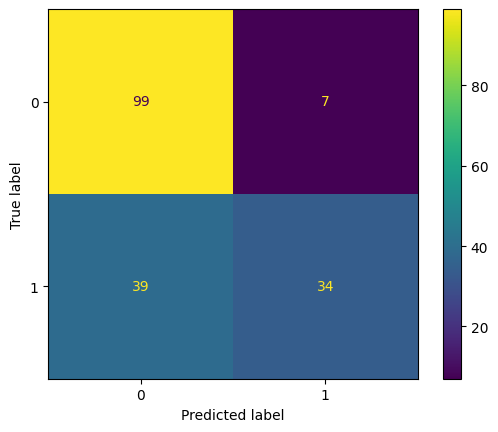

In [ ]:
# # Generate predictions
# predictions = best_xgb_model_5predict(X_test_preprocessed)

# Create confusion matrix
cm = confusion_matrix(y_test, predictions_test_6)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
39+7

46

No improvement, will not submit

In [ ]:
# #copy to new dataframe
# # copying data to another varaible to avoid any changes to original data
# df_test_6 = test_data.copy()
# df_test_6.head(2)

In [ ]:
# df_test_6.shape

In [ ]:
# # drop columns
# # drop ID column as it is not a determining factor for a model
# df_test_6 = df_test_6.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
# # verfiy dropped columns
# df_test_6.head()

In [ ]:
# # first column, CHECK instructions copied code
# solution_df_6 = pd.DataFrame(test_data['PassengerId'])
# solution_df_6

In [ ]:
# #generate predictions
# prediction6 = model_6_pipeline.predict(df_test_6)

In [ ]:
# # second column, CHECK instructions copied code
# solution_df_6['Survived'] = prediction6
# solution_df_6

In [ ]:
# # Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

# solution_df_6.to_csv('Sub6.csv',index=False)

NameError: name 'v' is not defined

# Model 7 Transfer Learning (with categorical data and new column)

use the mushroom prediction ntbk refernce for LSTM?? model to use TransferLearning approach

In [ ]:
# Clear the session data associated with the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 7
model_7_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_7_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


add categorical 'Age' column

In [ ]:
# Assuming your DataFrame is named 'df' and the 'Age' column exists

# Create a new column 'Age_Category'
model_7_data['Age_Category'] = pd.cut(model_7_data['Age'], bins=[0, 18, float('inf')], labels=['Child', 'Adult'])
model_7_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
0,0,3,male,22.000,1,0,7.250,S,Adult
1,1,1,female,38.000,1,0,71.283,C,Adult
2,1,3,female,26.000,0,0,7.925,S,Adult
3,1,1,female,35.000,1,0,53.100,S,Adult
4,0,3,male,35.000,0,0,8.050,S,Adult


In [ ]:
# drop ID column as it is not a determining factor for a model
model_7_data = model_7_data.drop(['Age','Fare','Embarked'],axis=1)      #NOTE: try keeping SibSp?
# verfiy dropped columns
model_7_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Age_Category
0,0,3,male,1,0,Adult
1,1,1,female,1,0,Adult
2,1,3,female,0,0,Adult
3,1,1,female,1,0,Adult
4,0,3,male,0,0,Adult


In [ ]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping

#### load and prepare data
# Define target variable (assuming 'Survived' is the binary class label)
target_variable = 'Survived'

# Split data into features (X) and target (y)
X = model_7_data.drop(target_variable, axis=1)
y = model_7_data[target_variable]

# Split data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(X_train.shape, X_test.shape)

####define preprocessing steps
# Define feature categories
numeric_cols = ['SibSp', 'Parch', 'Pclass']  # Adjust based on your data. #dropped 'Age','Fare'
categorical_cols = ['Sex', 'Age_Category']  # Adjust based on your data.  #dropped 'Embarked'

# Preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing steps for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

####Preprocess training data
# Preprocess training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Calculate the number of features after preprocessing
num_features = X_train_preprocessed.shape[1]

####Define Transfer Learning Model (LightGBM)
# Define LightGBM model parameters
model_params = {
    'objective': 'binary',  # Binary classification objective
    'metric': 'accuracy',  # Accuracy metric for early stopping
    'num_leaves': 5,
    'learning_rate': 0.08,
    'n_estimators': 100,
    'max_depth': 5,
    'class_weight': {0: 0.616, 1: 0.384},
    'random_state': 2
}

# Create the LightGBM classifier
clf = LGBMClassifier(**model_params)


####Fit the transfer learning model
# Create pipeline with preprocessing and LightGBM model
model_7_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', clf)
])

# Fit the pipeline on the preprocessed training data
model_7_pipeline.fit(X_train, y_train)



(712, 5) (179, 5)
[LightGBM] [Info] Number of positive: 263, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267475 -> initscore=-1.007473
[LightGBM] [Info] Start training from score -1.007473


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['SibSp', 'Parch', 'Pclass']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Age_Category'])])),
                ('model',
                 LGBMClassifier(class_weight={0: 0.616, 1: 0.384},
                                learning_rate=0.08, max_depth=5,
                                metric='accuracy', num_leaves=5,
                                objective='binary', random_state=2))])

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score

accuracies = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    # print(train_index)
    # print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply preprocessing steps before fitting the model
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    clf.fit(X_train_preprocessed, y_train)  # Fit on preprocessed data
    predictions = clf.predict(X_test_preprocessed) # Predict on preprocessed data
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

print(f"Average Accuracy: {sum(accuracies) / len(accuracies):.4f}")

[LightGBM] [Info] Number of positive: 283, number of negative: 429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291396 -> initscore=-0.888614
[LightGBM] [Info] Start training from score -0.888614
[LightGBM] [Info] Number of positive: 263, number of negative: 450
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 8
[LightGBM] [Info] [binary:BoostFromS

In [ ]:
#copy to new dataframe
# copying data to another varaible to avoid any changes to original data
df_test_7 = test_data.copy()
df_test_7.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S


In [ ]:
df_test_7.shape

(418, 11)

In [ ]:
# Create a new column 'Age_Category'
df_test_7['Age_Category'] = pd.cut(df_test_7['Age'], bins=[0, 18, float('inf')], labels=['Child', 'Adult'])
df_test_7.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Category
0,3,male,34.500,0,0,7.829,Q,Adult
1,3,female,47.000,1,0,7.000,S,Adult
2,2,male,62.000,0,0,9.688,Q,Adult
3,3,male,27.000,0,0,8.662,S,Adult
4,3,female,22.000,1,1,12.287,S,Adult


In [ ]:
# drop columns
# drop ID column as it is not a determining factor for a model
df_test_7 = df_test_7.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked','Age'],axis=1)
# verfiy dropped columns
df_test_7.head()

,Pclass,Sex,SibSp,Parch,Age_Category
0,3,male,0,0,Adult
1,3,female,1,0,Adult
2,2,male,0,0,Adult
3,3,male,0,0,Adult
4,3,female,1,1,Adult


In [ ]:
df_test_7.shape

In [ ]:
# first column, CHECK instructions copied code
solution_df_7 = pd.DataFrame(test_data['PassengerId'])
solution_df_7

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
#generate predictions
prediction7 = model_7_pipeline.predict(df_test_7)

In [ ]:
# second column,
solution_df_7['Survived'] = prediction7
solution_df_7

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df_7.to_csv('Sub7.csv',index=False)

# Template

In [ ]:
# Clear the session data associated with the backend
K.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)


In [ ]:
# copy prepped data into new data frame for model 0
model_2_data = prepped_data.copy()
# preview first 2 lines of new dataframe
model_2_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C


In [ ]:
# Dividing train data into X and y
X = model_3_data.drop(["Survived"], axis=1)
y = model_3_data["Survived"]

# splitting data in train and test sets, 70%, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y,
                  test_size=.20, random_state=1)


print(X_train.shape, X_test.shape)

# Define column names for separate processing:
numeric_cols = ['Age','SibSp','Parch', 'Fare']
categorical_cols= ['Pclass','Sex','Embarked']

# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #decicion tree can handle categorical columns
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combine preprocessing steps using ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Calculate the number of features after preprocessing
num_features = X_train_preprocessed.shape[1]

# Model definition:
model_3 = Sequential([
    Dense(256, activation='relu', input_shape=(num_features,), kernel_initializer='he_uniform'),
    Dense(128, activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(64,activation='relu',kernel_initializer='he_uniform'),
    Dense(256, activation='relu', input_shape=(num_features,), kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(128, activation='relu',kernel_initializer='he_uniform'),
    Dense(64,activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])


# Define the class weights manually
class_weights = {0: 0.6, 1: 0.4}  # 60:40 ratio to match overall data set ratio

# Define the learning rate
learning_rate = 0.000001

# Create the Adam optimizer instance with the specified learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Define the desired metrics for model compilation
metrics = [accuracy_score]    #Accuracy()

# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='accuarcy', min_delta=0.01, mode='max',patience=5)

#Compile the model
model_3.compile(optimizer=adam_optimizer,
                loss='binary_crossentropy',  # Binary crossentropy loss for binary classification
                metrics=metrics)  # Accuracy metric

# Fit the pipeline on encoded labels:
# Create a pipeline that includes the preprocessing step before the model
model_3_pipeline = Pipeline([
    ('preprocess', preprocessor),  # Preprocessing steps (including one-hot encoding)
    ('model', KerasClassifier(model=model_2, epochs=100, batch_size=64,
                              class_weight=class_weights, random_state=2,  callbacks=[es_cb],
                              verbose=1))
])

# Fit the pipeline
model_3_pipeline.fit(X_train, y_train)

(623, 7) (268, 7)
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6682 - loss: 0.6693
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8601 - loss: 0.3414
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.3022
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.2611
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.2317
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - loss: 0.2038
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9393 - loss: 0.1735
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1506
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.1291
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.1135
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9755 - loss: 0.0971
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('model',
                 KerasClassifier(batch_size=32, epochs=100, model=<Sequential name=sequential_8, built=True>, random_state=1))])

In [ ]:
# # Generate predictions on labels:
# predictions_train = model_2_pipeline.predict(X_train) # Use pipeline to predict

# Access history from 'model' step
# save in history variable to plot below
history_2_train = model_2_pipeline.named_steps['model'].model.history

In [ ]:
predictions_test = model_2_pipeline.predict(X_test)   # Use pipeline to predict
# Access history from 'model' step
# save in history variable to plot below
history_2_test = model_2_pipeline.named_steps['model'].model.history

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
evaluate_model(model_##_pipeline, X_train, y_train, X_test, y_test)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation Set:
Accuracy: 0.7612
Precision: 0.8000
Recall: 0.5913
F1-score: 0.6800



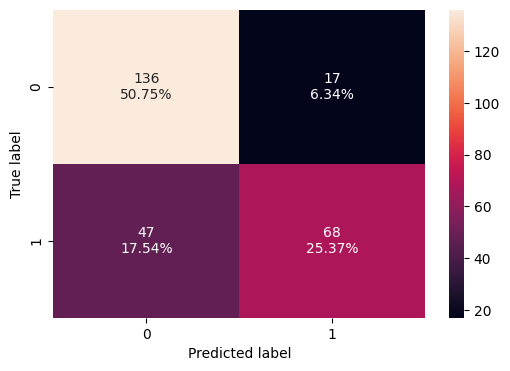

In [ ]:
make_confusion_matrix(y_test, predictions_test)

In [ ]:
#copy to new dataframe
# copying data to another varaible to avoid any changes to original data
df_test_3 = test_data.copy()
df_test_3.head(2)

In [ ]:
df_test_3.shape

In [ ]:
# drop columns
# drop ID column as it is not a determining factor for a model
df_test_3 = df_test_3.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
# verfiy dropped columns
df_test_3.head()

In [ ]:
# first column, CHECK instructions copied code
solution_df_3 = pd.DataFrame(test_data['PassengerId'])
solution_df_3

In [ ]:
#generate predictions
prediction3 = model_3_pipeline.predict(df_test_3)

In [ ]:
# second column, CHECK instructions copied code
solution_df_3['Survived'] = prediction3
solution_df_3

In [ ]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df_3.to_csv('Sub3.csv',index=False)

NameError: name 'v' is not defined